In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [4]:
dt=pd.read_csv("admins.csv")

In [5]:
dt.head()

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2015,95,92,2,100,IIT delhi
1,2015,75,88,3,1023,VIT vellore
2,2015,83,84,6,2935,Ahemedabad IT
3,2015,75,91,8,5647,University college of ENGG
4,2015,94,94,9,3564,SRMIST chennai


In [7]:
college=np.unique(dt['College'])
print(college)

['Ahemedabad IT' 'BIT Mesra' 'BITS pilani' 'BMS college of ENGG'
 'DTU delhi' 'HBUT kanpur' 'IIEST shibpur' 'IIIT hydrabad' 'IIT Bombay'
 'IIT bhilai' 'IIT delhi' 'IIT goa' 'IIT guwahati' 'IIT hydrabad'
 'IIT indore' 'IIT jammu' 'IIT jodhpur' 'IIT kanpur' 'IIT kharagpur'
 'IIT mandi' 'IIT palakkad' 'IIT ropar' 'IIT tirupati'
 'Jadavpur Univversity' 'KLEF hydrabad' 'MNIT jaipur' 'MNNIT allahabad'
 'MSIT' 'Manipal IT' 'NIT trichy' 'NIT warangal' 'NMIMS'
 'Netaji Subhas IT' 'S O A  university' 'SRMIST chennai'
 'SSN college of ENGG' 'University college of ENGG' 'VIT vellore']


In [8]:
clg_id=[]
for i in range(len(college)):
    clg_id.append(i+1)
print(clg_id)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


In [9]:
dt['College_id']=dt['College'].replace(college,clg_id)
dt.head()

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College,College_id
0,2015,95,92,2,100,IIT delhi,11
1,2015,75,88,3,1023,VIT vellore,38
2,2015,83,84,6,2935,Ahemedabad IT,1
3,2015,75,91,8,5647,University college of ENGG,37
4,2015,94,94,9,3564,SRMIST chennai,35


In [36]:
dt.describe()

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College_id
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,2017.389442,87.000996,87.935259,4.216135,3348.584661,19.889442
std,1.198507,5.351549,4.704084,2.551972,1963.073509,11.331968
min,2015.000000,74.000000,74.000000,1.000000,45.000000,1.000000
25%,2016.000000,85.000000,85.000000,2.000000,2135.000000,10.000000
50%,2018.000000,88.000000,88.000000,4.000000,3215.000000,20.000000
75%,2018.000000,91.000000,92.000000,6.000000,4523.000000,30.000000
max,2019.000000,95.000000,95.000000,11.000000,9878.000000,38.000000


In [37]:
dt["College"].value_counts()

IIT palakkad                  50
S O A  university             49
Ahemedabad IT                 49
SSN college of ENGG           45
Manipal IT                    43
IIT jodhpur                   43
NMIMS                         42
IIT jammu                     35
SRMIST chennai                32
IIT bhilai                    32
IIT goa                       30
IIT indore                    30
MNNIT allahabad               29
BIT Mesra                     29
IIEST shibpur                 29
KLEF hydrabad                 29
MNIT jaipur                   29
BMS college of ENGG           29
University college of ENGG    29
HBUT kanpur                   25
IIT kanpur                    21
IIT Bombay                    20
MSIT                          19
IIT hydrabad                  19
IIT kharagpur                 18
IIT guwahati                  18
DTU delhi                     17
IIT mandi                     17
IIIT hydrabad                 17
IIT delhi                     17
VIT vellor

ValueError: setting an array element with a sequence.

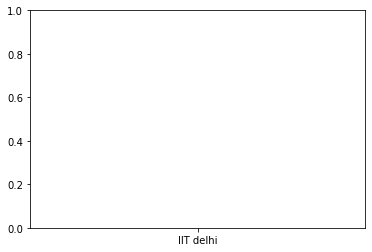

In [10]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

x = dt.iloc[:, 4].values
y = dt.iloc[:, 6].values
print(x)
print(y)

[ 100 1023 2935 ...  100  515 1730]
[11 38  1 ...  9 14 15]


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

y_col=y_test
x_col=x_test

x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

print('Shape of X_train:: ', x_train.shape)
print('Shape of y_train:: ', y_train.shape)
print('Shape of X_test:: ', x_test.shape)
print('Shape of y_test:: ', y_test.shape)

Shape of X_train::  (803, 1)
Shape of y_train::  (803,)
Shape of X_test::  (201, 1)
Shape of y_test::  (201,)


In [12]:
lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)
prediction = lm.predict(x_test)

#print('Coefficient:', model.coef_)
print("RMSE: %.2f" % np.sqrt(np.mean((lm.predict(x_test) - y_test) ** 2)))

RMSE: 11.64


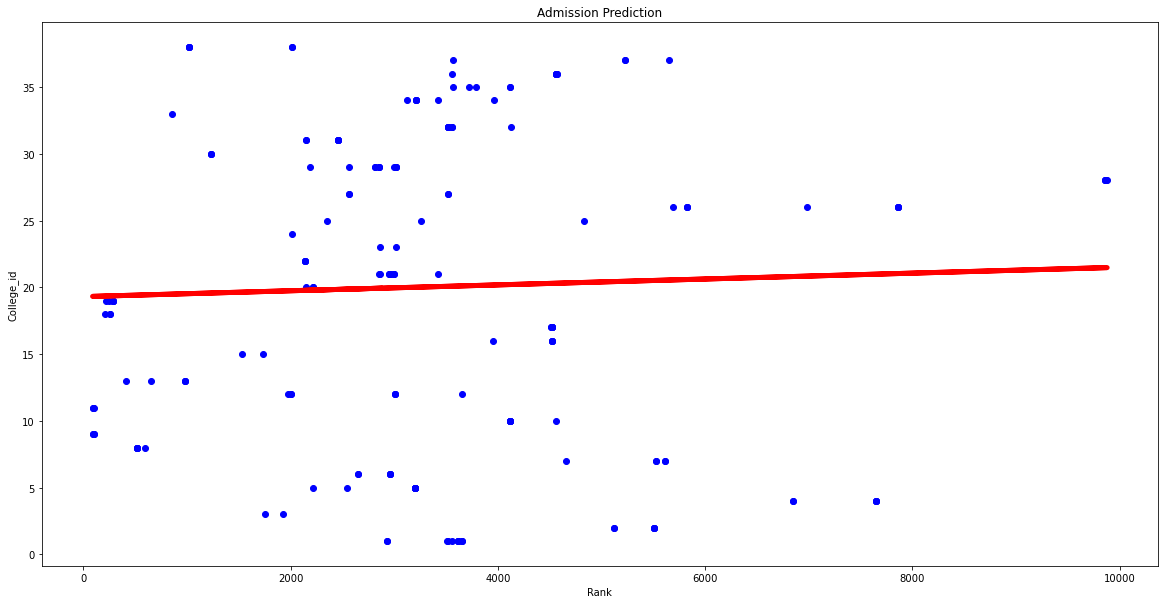

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(x_test, y_test,  color='blue')
plt.plot(x_test, prediction, color='red', linewidth=5)

plt.xlabel("Rank")
plt.ylabel("College_id")
plt.title("Admission Prediction")
plt.show()

In [14]:
prds=np.floor(prediction)
prds

array([19., 20., 20., 19., 20., 19., 20., 19., 20., 20., 19., 20., 19.,
       19., 20., 19., 20., 20., 19., 20., 19., 19., 19., 19., 19., 20.,
       20., 20., 20., 19., 20., 20., 20., 21., 19., 19., 19., 19., 20.,
       19., 20., 20., 19., 20., 19., 20., 19., 19., 20., 19., 19., 19.,
       19., 20., 20., 20., 19., 20., 20., 19., 20., 20., 19., 19., 19.,
       19., 19., 20., 19., 20., 19., 19., 21., 20., 19., 20., 20., 20.,
       20., 20., 20., 19., 19., 19., 19., 19., 20., 20., 20., 20., 21.,
       20., 19., 20., 19., 19., 20., 19., 19., 20., 19., 19., 20., 19.,
       21., 20., 20., 20., 20., 19., 19., 20., 20., 20., 20., 20., 20.,
       20., 20., 19., 19., 19., 20., 20., 19., 20., 19., 19., 19., 19.,
       19., 20., 20., 20., 19., 19., 19., 20., 19., 19., 19., 20., 20.,
       19., 20., 19., 20., 20., 20., 19., 21., 19., 20., 19., 19., 19.,
       19., 21., 20., 20., 19., 20., 20., 19., 20., 19., 19., 20., 20.,
       19., 19., 20., 19., 20., 19., 19., 20., 20., 21., 19., 19

In [15]:
sol=pd.DataFrame()
sol["Rank"]=x_col
sol["College_id"]=y_col
sol["College"]=sol["College_id"].replace(clg_id,college)
sol.head()

,Rank,College_id,College
0,2135,22,IIT ropar
1,5826,26,MNIT jaipur
2,3425,34,S O A university
3,515,8,IIIT hydrabad
4,3201,5,DTU delhi


In [18]:
temp=pd.DataFrame()
temp["t"]=[2500,500,1,7500,90000,200]

In [19]:
temp.head()

,t
0,2500
1,500
2,1
3,7500
4,90000


In [21]:
pr = lm.predict(temp)

In [25]:
pr=np.floor(pr)
pr

array([19., 19., 19., 20., 39., 19.])

In [30]:
dt[dt["College_id"]==39]

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College,College_id


<AxesSubplot:>

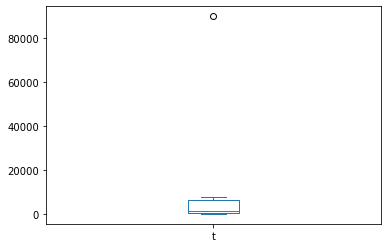

In [34]:
temp["t"].plot.box()